In [1]:
!wget https://pjreddie.com/media/files/mnist_train.csv
!wget https://github.com/Naxalov/ComputerVision/raw/master/MNIST_TEST/mnist_test.zip

--2021-06-30 08:54:36--  https://pjreddie.com/media/files/mnist_train.csv
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [application/octet-stream]
Saving to: ‘mnist_train.csv.1’

mnist_train.csv.1   100%[===================>] 104.50M  49.2MB/s    in 2.1s    

2021-06-30 08:54:38 (49.2 MB/s) - ‘mnist_train.csv.1’ saved [109575994/109575994]

--2021-06-30 08:54:38--  https://github.com/Naxalov/ComputerVision/raw/master/MNIST_TEST/mnist_test.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Naxalov/ComputerVision/master/MNIST_TEST/mnist_test.zip [following]
--2021-06-30 08:54:38--  https://raw.githubusercontent.com/Naxalov/ComputerVision/master/MNIST_TEST/mnist_test.zip


In [2]:
!unzip mnist_test.zip

Archive:  mnist_test.zip
replace mnist_test/test_15.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: mnist_test/test_15.jpg  
  inflating: mnist_test/test_14.jpg  
  inflating: mnist_test/test_13.jpg  
  inflating: mnist_test/test_12.jpg  
  inflating: mnist_test/test_11.jpg  
  inflating: mnist_test/test_10.jpg  
  inflating: mnist_test/test_9.jpg   
  inflating: mnist_test/test_7.jpg   
  inflating: mnist_test/test_6.jpg   
  inflating: mnist_test/test_5.jpg   
  inflating: mnist_test/test_4.jpg   
  inflating: mnist_test/test_3.jpg   
  inflating: mnist_test/test_2.jpg   
  inflating: mnist_test/test_1.jpg   
  inflating: mnist_test/test_8.jpg   


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers,Sequential
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
data = np.genfromtxt('mnist_train.csv', delimiter=',')

In [5]:
x = data[:, 1:]
y = data[:, 0]

In [6]:
def digit_show(x, label):
    img = x.reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.title(str(int(label)), fontsize=20)
    plt.axis('off')
    plt.show()

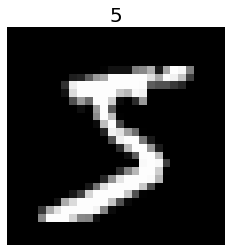

In [7]:
digit_show(x[0], y[0])

In [8]:
print(y[:5])
print(x[:5])

[5. 0. 4. 1. 9.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [11]:
print(y_train[:5])

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)


In [12]:
model = Sequential()

model.add(layers.Dense(512, input_shape=[784]))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 12s 9ms/step - loss: 3.0858 - accuracy: 0.8573 - val_loss: 0.8624 - val_accuracy: 0.8941
Epoch 2/15
1313/1313 [==============================] - 11s 8ms/step - loss: 0.6496 - accuracy: 0.8992 - val_loss: 0.5330 - val_accuracy: 0.9094
Epoch 3/15
1313/1313 [==============================] - 11s 8ms/step - loss: 0.3927 - accuracy: 0.9154 - val_loss: 0.3356 - val_accuracy: 0.9320
Epoch 4/15
1313/1313 [==============================] - 11s 8ms/step - loss: 0.3311 - accuracy: 0.9233 - val_loss: 0.2876 - val_accuracy: 0.9319
Epoch 5/15
1313/1313 [==============================] - 11s 9ms/step - loss: 0.2618 - accuracy: 0.9326 - val_loss: 0.2593 - val_accuracy: 0.9347
Epoch 6/15
1313/1313 [==============================] - 12s 10ms/step - loss: 0.2418 - accuracy: 0.9355 - val_loss: 0.2043 - val_accuracy: 0.9446
Epoch 7/15
1313/1313 [==============================] - 11s 9ms/step - loss: 0.2205 - accuracy: 0.9402 - val_loss: 0.2490 - val_a

In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = range(15)

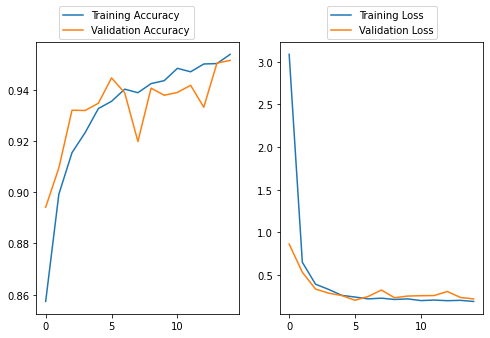

In [15]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, accuracy, label='Training Accuracy')
plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
plt.legend(bbox_to_anchor=(0.8,1.15), ncol=1)

plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(bbox_to_anchor=(0.8, 1.15), ncol=1)

plt.show()

In [16]:
y_hat = model.predict(x_test)

In [17]:
print(y_test[:5])
print(y_hat[:5])

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)
[[1.4048244e-07 8.7461103e-08 5.1626444e-07 4.5365985e-05 6.6376927e-08
  5.5556705e-14 0.0000000e+00 9.9995196e-01 1.3472975e-12 1.7473463e-06]
 [1.3538432e-18 2.5471650e-12 1.6232823e-04 9.9983311e-01 8.3665367e-26
  3.0234005e-06 0.0000000e+00 6.9600901e-11 6.7247925e-07 8.6464064e-07]
 [4.9580126e-07 1.4939312e-06 2.3322482e-05 9.9840420e-08 3.6456647e-14
  3.7644202e-06 6.3713330e-13 2.5915364e-07 9.9997056e-01 5.4188884e-08]
 [8.7156304e-06 1.3425837e-07 2.0403263e-08 2.7968910e-05 3.6131521e-05
  1.6806556e-04 3.6430938e-15 7.5896812e-04 6.1788196e-05 9.9893814e-01]
 [3.2950110e-14 1.0900334e-14 4.1519779e-05 9.9994612e-01 2.3457955e-26
  9.2694054e-06 0.0000000e+00 8.0703236e-11 3.2953372e-07 2.7465192e-06]]


In [18]:
labels = np.argmax(y_test, axis=1)
prediction = np.argmax(y_hat, axis=1)

In [19]:
print(y_hat.shape)
print(prediction.shape)

(18000, 10)
(18000,)


In [20]:
print(labels[:5])
print(prediction[:5])

[7 3 8 9 3]
[7 3 8 9 3]


In [21]:
confusion_matrix = tf.math.confusion_matrix(labels, prediction)

In [22]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1733,    2,    8,    0,    8,    3,   17,    1,   31,    2],
       [   0, 1959,   14,    1,    4,    0,    2,    3,    8,    3],
       [   4,    4, 1701,    5,   10,    0,    3,    9,   22,    1],
       [   0,    2,   49, 1679,    1,   32,    3,   14,   54,   12],
       [   0,    3,    8,    0, 1601,    0,    4,   59,    9,   42],
       [   5,    0,    5,   11,    3, 1558,   14,    2,   45,   10],
       [   7,    0,    3,    0,   16,   10, 1731,    0,   20,    0],
       [   0,   10,   29,    0,    2,    1,    0, 1877,    9,    9],
       [   2,   14,   14,    7,    6,    8,    6,    6, 1658,    9],
       [   7,    1,    2,    3,   25,    5,    0,   64,   27, 1629]],
      dtype=int32)>

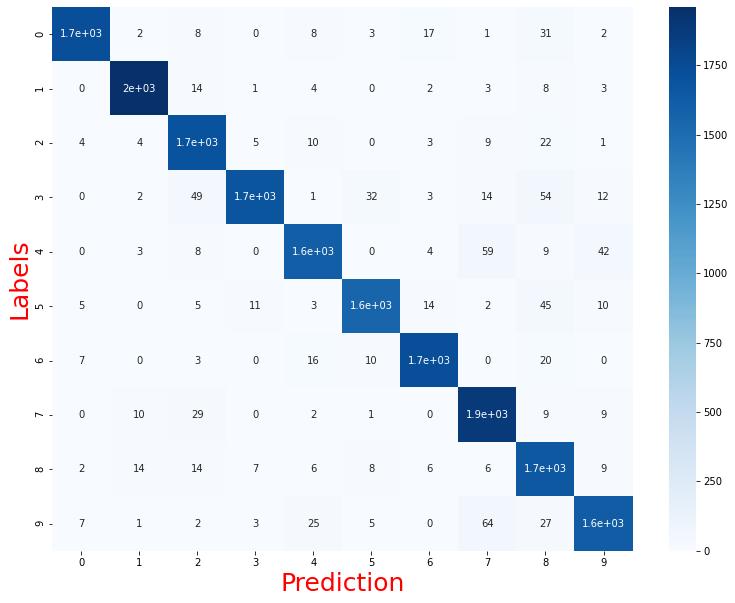

In [23]:
plt.figure(figsize=(13,10))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Prediction', color='r', fontsize=25)
plt.ylabel('Labels', color='r', fontsize=25)
plt.show()

26


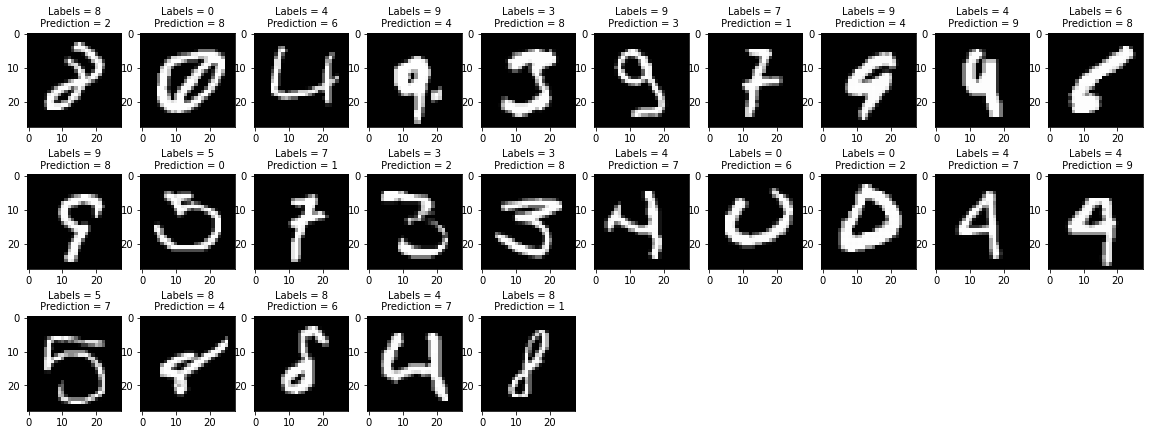

In [24]:
plt.figure(figsize=(20,10))
n=550
j=1
for i in range(n):
    if labels[i] != prediction[i]:
        img = x_test[i].reshape(28,28)
        plt.subplot(4,10,j)
        plt.imshow(img, cmap='gray')
        plt.title(f'Labels = {labels[i]}\n Prediction = {prediction[i]}', fontsize=10)
        j+=1
print(j)
plt.show()